In [1]:
#import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as st
import sklearn.datasets as dta
import numpy as np 
from datetime import datetime
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
#call in csv file and set up API keys
microplastics_csv = pd.read_csv("Resources/MarinePlastics.csv")

microplastics_csv.head()
#test
#test2

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Accession Number,Accession Link,GlobalID,CreationDate,Creator,EditDate,Editor,Long Reference,x,y
0,35217,4/6/2005 12:00:00 AM,2.19,-135.73,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,6d278226-565e-4ed0-b46a-e1cabb32ecc0,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.510939e+07,2.438491e+05
1,36142,2/24/2002 12:00:00 AM,-12.69,-142.30,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,6fb35a58-21b6-4cce-9dbb-f9c222bc311d,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.584076e+07,-1.424337e+06
2,35881,10/25/2010 12:00:00 AM,19.62,-146.50,Pacific Ocean,NaN,NaN,0.00216,pieces/m3,0.0005-0.005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,67f360ab-017e-4a86-931b-6f7336c2c206,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.630831e+07,2.228069e+06
3,36474,11/16/2003 12:00:00 AM,18.97,-143.47,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,5be50d3b-7343-45f0-ac71-19a3cdc047ea,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.597101e+07,2.151404e+06
4,34553,3/5/2001 12:00:00 AM,19.38,-74.09,Atlantic Ocean,Caribbean Sea,NaN,0.00000,pieces/m3,0-0.0005,...,211007,https://www.ncei.noaa.gov/access/metadata/land...,5e54fac6-640b-4445-8fff-94a9498d6168,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-8.247661e+06,2.199726e+06


In [3]:
#taking columns we need
clean_microplastics_df = microplastics_csv[["Date","Oceans","Measurement","Unit","Sampling Method"]]
clean_microplastics_df["Year"] = pd.Series()
clean_microplastics_df.head()

,Date,Oceans,Measurement,Unit,Sampling Method,Year
0,4/6/2005 12:00:00 AM,Pacific Ocean,0.00000,pieces/m3,Neuston net,NaN
1,2/24/2002 12:00:00 AM,Pacific Ocean,0.00000,pieces/m3,Neuston net,NaN
2,10/25/2010 12:00:00 AM,Pacific Ocean,0.00216,pieces/m3,Neuston net,NaN
3,11/16/2003 12:00:00 AM,Pacific Ocean,0.00000,pieces/m3,Neuston net,NaN
4,3/5/2001 12:00:00 AM,Atlantic Ocean,0.00000,pieces/m3,Neuston net,NaN


In [4]:
#cleaning time column
for i in range(len(clean_microplastics_df["Date"])):
    date_time = clean_microplastics_df.loc[i,"Date"]
    date = date_time.split(" ")[0]
    clean_microplastics_df.loc[i,"Date"]=date
clean_microplastics_df.head()

,Date,Oceans,Measurement,Unit,Sampling Method,Year
0,4/6/2005,Pacific Ocean,0.00000,pieces/m3,Neuston net,NaN
1,2/24/2002,Pacific Ocean,0.00000,pieces/m3,Neuston net,NaN
2,10/25/2010,Pacific Ocean,0.00216,pieces/m3,Neuston net,NaN
3,11/16/2003,Pacific Ocean,0.00000,pieces/m3,Neuston net,NaN
4,3/5/2001,Atlantic Ocean,0.00000,pieces/m3,Neuston net,NaN


In [5]:
for x in range(len(clean_microplastics_df["Year"])):
    year_time = clean_microplastics_df.loc[x,"Date"]
    year = year_time.split("/")[2]
    clean_microplastics_df.loc[x,"Year"]=year
clean_microplastics_df.tail()
    

,Date,Oceans,Measurement,Unit,Sampling Method,Year
11301,11/28/2014,Atlantic Ocean,0.00200,pieces/m3,Grab sample,2014
11302,12/11/2014,Atlantic Ocean,0.02500,pieces/m3,Grab sample,2014
11303,11/7/1995,Atlantic Ocean,0.00864,pieces/m3,Neuston net,1995
11304,10/31/2001,Atlantic Ocean,0.01080,pieces/m3,Neuston net,2001
11305,5/21/2014,Atlantic Ocean,0.00200,pieces/m3,Grab sample,2014


In [6]:
# sampling_mean = clean_microplastics_df.groupby(["Sampling Method"]).mean()["Measurement"]
# sampling_median = clean_microplastics_df.groupby(["Sampling Method"]).median()["Measurement"]
# sampling_max = clean_microplastics_df.groupby(["Sampling Method"]).max()["Measurement"]
# sampling_min = clean_microplastics_df.groupby(["Sampling Method"]).min()["Measurement"]

# sampling_statistics = pd.DataFrame ({
#     "Mean Measument per Sampling": sampling_mean,
#     "Median Measument per Sampling": sampling_median,
#     "Max Measument per Sampling": sampling_max,
#     "Min Measument per Sampling": sampling_min})

# sampling_statistics.head()

In [7]:
atlantic_mean = clean_microplastics_df[clean_microplastics_df["Oceans"] == "Atlantic Ocean"].groupby("Year")["Measurement"].mean()

atlantic_mean_df = pd.DataFrame({
    "Year": atlantic_mean.index,
    "Average microplastics Per Year in the Pacific Ocean": atlantic_mean.values
})

atlantic_mean_df

,Year,Average microplastics Per Year in the Pacific Ocean
0,1986,0.027291
1,1987,0.024966
2,1989,0.024941
3,1990,0.025754
4,1991,0.019063
5,1992,0.017570
6,1993,0.020521
7,1994,0.011186
8,1995,0.027987
9,1996,0.040504


In [8]:
#finding the mean value per year of microplastics in the Pacific ocean
pacific_mean = clean_microplastics_df[clean_microplastics_df["Oceans"] == "Pacific Ocean"].groupby("Year")["Measurement"].mean()

pacific_mean_df = pd.DataFrame({
    "Year": pacific_mean.index,
    "Average microplastics Per Year in the Pacific Ocean": pacific_mean.values
})

pacific_mean_df

,Year,Average microplastics Per Year in the Pacific Ocean
0,1972,0.016419
1,1973,0.022286
2,1987,0.014000
3,1999,0.010800
4,2000,0.026167
5,2001,0.002437
6,2002,0.008121
7,2003,0.009513
8,2004,0.057162
9,2005,0.075480


In [9]:
arctic_mean = clean_microplastics_df[clean_microplastics_df["Oceans"] == "Arctic Ocean"].groupby("Year")["Measurement"].mean()

arctic_mean_df = pd.DataFrame({
    "Year": arctic_mean.index,
    "Average microplastics Per Year in the Arctic Ocean": arctic_mean.values
})

arctic_mean_df

,Year,Average microplastics Per Year in the Arctic Ocean
0,2014,0.014000
1,2015,0.021000
2,2016,0.032905
3,2021,0.036970


In [10]:
date_mean = clean_microplastics_df.groupby(["Year"]).mean()["Measurement"]
date_mean_df = pd.DataFrame({
    "Average microplastics found Per Year": date_mean})
date_mean_df

,Average microplastics found Per Year
Year,
1972,0.016419
1973,0.022286
1986,0.027291
1987,0.023399
1989,0.024941
1990,0.025754
1991,0.019063
1992,0.017570
1993,0.020521


In [11]:
#creating a box plot for all the oceans
#creating a box plot for all the oceans
ocean_list = ["Pacific Ocean","Atlantic Ocean","Arctic Ocean"]

ocean_amt_list = []

for ocean in ocean_list:
    ocean_amt = clean_microplastics_df.loc[clean_microplastics_df["Oceans"]==ocean, "Measurement"]
    ocean_amt_list.append(ocean_amt)
    ocean_quantiles = ocean_amt.quantile([.25,.5,.75])
    lowerq = ocean_amt.quantile(.25)
    upperq = ocean_amt.quantile(.75)
    iqr = upperq - lowerq
    lowerb = lowerq - (1.5*iqr)
    upperb = upperq + (1.5*iqr)
    outliers = ocean_amt.loc[(ocean_amt > upperb) | (ocean_amt < lowerb)]
    print(ocean, outliers)
    print(ocean_quantiles)

Pacific Ocean 18        4.666000
19        3.602000
28       18.630465
29        4.295994
69        6.293373
           ...    
11189     3.531028
11205     1.234553
11207     1.309742
11246     0.918348
11281     1.170560
Name: Measurement, Length: 754, dtype: float64
0.25    0.000000
0.50    0.003000
0.75    0.326132
Name: Measurement, dtype: float64
Atlantic Ocean 14       27.000000
16        0.153348
50        0.494305
53        0.201800
62        0.279013
           ...    
11276     0.107992
11277     0.151188
11283     0.078960
11284     0.136068
11286     0.071276
Name: Measurement, Length: 965, dtype: float64
0.25    0.00000
0.50    0.00432
0.75    0.02160
Name: Measurement, dtype: float64
Arctic Ocean 11040    0.104674
Name: Measurement, dtype: float64
0.25    0.006809
0.50    0.017500
0.75    0.044929
Name: Measurement, dtype: float64


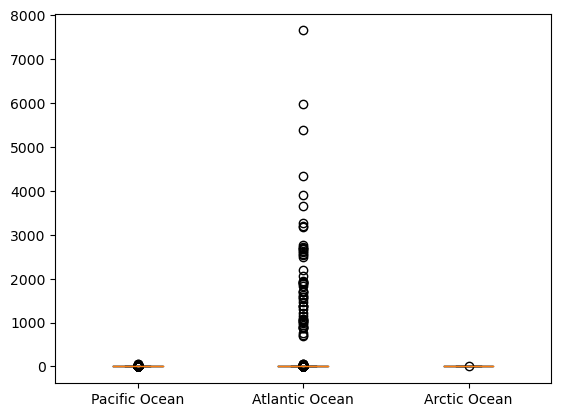

In [25]:
#note that this boxplot DOES show outliers
plt.boxplot(ocean_amt_list,labels=ocean_list,showfliers=True)
plt.savefig("output_data/Fig0.png")
plt.show()

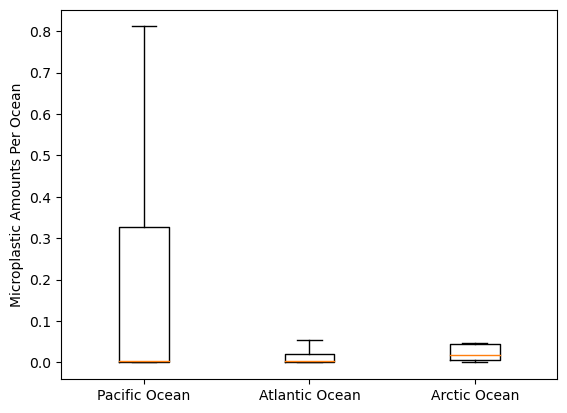

In [15]:
#note that this boxplot does NOT show outliers due to 'showfliers' boolean
plt.boxplot(ocean_amt_list,labels=ocean_list,showfliers=False)
plt.ylabel("Microplastic Amounts Per Ocean")
plt.savefig("output_data/Fig1.png")
plt.show()

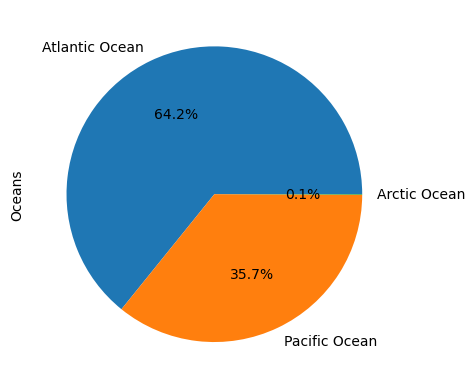

In [23]:
# #pie chart with oceans. its important to take into
ocean_pie_chart = clean_microplastics_df["Oceans"].value_counts()
ocean_pie_chart.plot.pie(autopct= "%1.1f%%")
plt.savefig("output_data/Fig2.png")
plt.show()


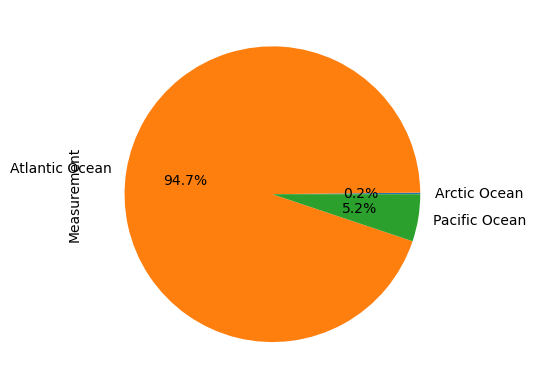

In [24]:
ocean_pie = clean_microplastics_df.groupby("Oceans")["Measurement"].mean()
ocean_pie.plot.pie(autopct= "%1.1f%%")
plt.savefig("output_data/Fig3.png")
plt.show()

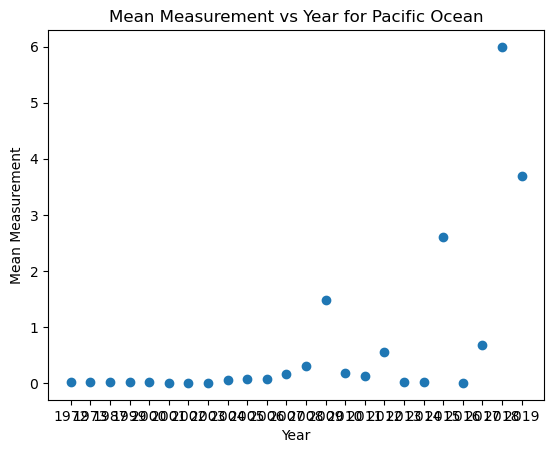

In [28]:
# #create a scatter plot of avg measurement for Pacific ocean over time
# fig1, ax1 = plt.subplots()


# avg_pac_time = clean_microplastics_df.loc[clean_microplastics_df["Oceans"] == "Pacific",:]
# avg_pac_time_plot = avg_pac_time.groupby("Oceans")[["Year","Measurement"]].mean()


# marker_size=15
# plt.scatter(avg_pac_time_plot["Year"],avg_pac_time_plot['Measurement'],s=175, color="blue")
# plt.xlabel("Year",fontsize =14)
# plt.ylabel('Average Microplastic Measurement')
# plt.show()

# Filter the DataFrame by the specific ocean you are interested in
pacific_df = clean_microplastics_df[clean_microplastics_df['Oceans'] == 'Pacific Ocean']

# Group the filtered DataFrame by year and calculate the mean of the measurement column
mean_df = pacific_df.groupby('Year')['Measurement'].mean().reset_index()

# Create a scatter plot with the year on the x-axis and the mean of the measurement column on the y-axis
plt.scatter(mean_df['Year'], mean_df['Measurement'])

# Set the title and labels for the plot
plt.title('Mean Measurement vs Year for Pacific Ocean')
plt.xlabel('Year')
plt.ylabel('Mean Measurement')

# Show the plot
plt.show()

In [ ]:
# #display results for microplastics over time

# sample_df = clean_microplastics_df.sample(n=1000)
# sample_df.head()

# x_values = sample_df["Year"]
# y_values = sample_df["Measurement"]
# plt.ylim(0,1)
# plt.bar(x_values,y_values)
# plt.show()


In [ ]:
#display regression plots 